# Homework 4 (100 Points)

The goal of this homework is to get practice with classification.

## Exercise 1 (50 Points)

For this question we will re-use the "mnist_784" dataset from Homework 3.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from). **- 5 Points**

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True, as_frame=False)

# Split training set into training and testing set
X_train, X_test, Y_train, Y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 1)

print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', Y_train.shape)
print('y_test shape:', Y_test.shape)

X_train shape: (56000, 784)
X_test shape: (14000, 784)
y_train shape: (56000,)
y_test shape: (14000,)


b) Train a KNN model (on the training set) with any value of K you want and print out the confusion matrix when predicting the testing set. How well did your model perform? Which classes were most confused? - **5 Points**

Accuracy on testing set =  0.9709285714285715


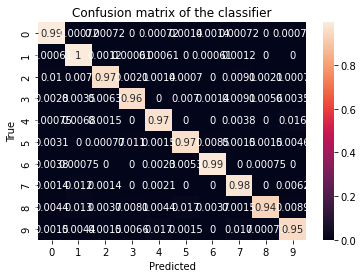

In [2]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


def train(X_train, Y_train, k):
    # Learn the model
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)

    with open('model.obj', 'wb') as f:
        pickle.dump(knn, f)


def test(X_test, Y_test):
    with open('model.obj', 'rb') as f:
        knn = pickle.load(f)
    
    Y_test_predictions = knn.predict(X_test)
    print("Accuracy on testing set = ", accuracy_score(Y_test, Y_test_predictions))

    # Plot a confusion matrix
    cm = confusion_matrix(Y_test, Y_test_predictions, normalize='true')
    sns.heatmap(cm, annot=True)
    plt.title('Confusion matrix of the classifier')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

train(X_train, Y_train, 4)
test(X_test, Y_test)


-> I choose 4 as the value of K and the overall accuracy of it is 97%. The most confused classes are 8 and 9 which have 94% and 95% accuracy, each. The matrix shows over 95% of accuracy for most of the classes, which we could realize that the model shows decent performance overall.

c) For K ranging from 1 to 20:
1. train a KNN on the training data - **3 points**
2. record the training and testing accuracy - **3 points**

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.  **- 5 points**

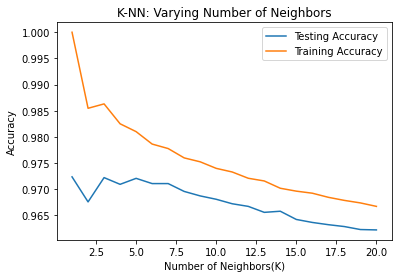

In [3]:
train_acc = []
test_acc = []

index = np.arange(1, 21)

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors= k)
    knn.fit(X_train, Y_train)
    trainscore = knn.score(X_train, Y_train)
    train_acc.append(trainscore)

    testscore = knn.score(X_test, Y_test)
    test_acc.append(testscore)
plt.title('K-NN: Varying Number of Neighbors')
plt.plot(index, test_acc, label = 'Testing Accuracy')
plt.plot(index, train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel("Number of Neighbors(K)")
plt.ylabel('Accuracy')
plt.show()

-> k = 1 seems optimal in this graph as both testing accuracy and training accuracy are the highest.  

d) Using the optimal model found in c), plot the confusion matrix and discuss. - **5 points**

Accuracy on testing set =  0.9723571428571428


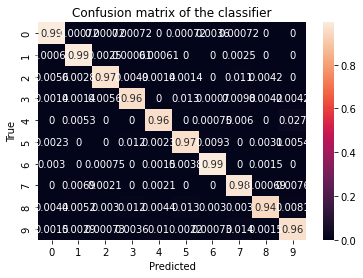

In [4]:
train(X_train, Y_train, 1)
test(X_test, Y_test)

-> As we expected, k = 1 has an accuracy of 97.2% which is the most highest accuracy compare to other values of k. 

e) Using the entire dataset (training + testing set): Use k-fold cross validation (with k=10) to evaluate the perfomance of your KNN model. By varying K from 1 to 20 as in c), determine the optimal number of neighbors for your KNN model based on the mean cv accuracy. Plot a graph of the training and testing set accuracy (use the mean cv accuracy) as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Discuss similarities or differences with results in c). **- 10 points**

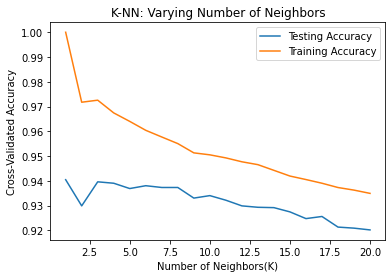

In [7]:
from sklearn.model_selection import cross_validate

# It took more than 900m with the whole data set, so I reduced dataset to 5%
Xrows, Xcolumns = X.shape
reducedrowx= int(Xrows*0.1)

reducedX = X[:reducedrowx, ]
reducedy = y[:reducedrowx, ]

cv_test_acc = []
cv_train_acc = []


index = np.arange(1, 21)

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors= k)
    score = cross_validate(knn, reducedX, reducedy, cv = 10, return_train_score=True)
    cv_test_acc.append(score['test_score'].mean())
    cv_train_acc.append(score['train_score'].mean())

plt.title('K-NN: Varying Number of Neighbors')
plt.plot(index, cv_test_acc, label = 'Testing Accuracy')
plt.plot(index, cv_train_acc, label = 'Training Accuracy')
plt.legend()
plt.xlabel("Number of Neighbors(K)")
plt.ylabel('Cross-Validated Accuracy')
plt.show()

-> Still, 1 is optimal value for k. It is almost the same compare with the graph in C. The only difference is that the winding shape on the training accurary is flattened and the testing accuracy slightly rises at k = 17.

f) Using the best model from d), pick an image at random and plot it next to its k nearest neighbors. **- 7 points**

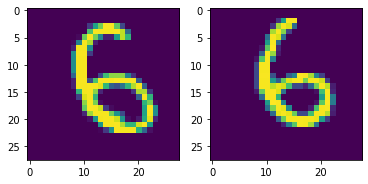

In [20]:
def plot_k_neighbors(model, x, k):
    _, neighbors = model.kneighbors(x)
    plt.subplot(1,k+1,1)
    plt.imshow(x[0].reshape(28, 28))
    i = 2
    for n in neighbors[0]:
        plt.subplot(1,k+1,i)
        plt.imshow(X_train[n].reshape(28, 28))
        i += 1
    plt.show()

knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(X_train, Y_train)
# score = cross_validate(knn, X, y, cv = 10, return_train_score=True)

plot_k_neighbors(knn, [X_test[0]], 1)  

g) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat e) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension. **- 7 points**

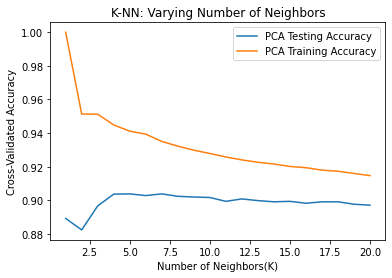

In [9]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA

dimensionality_reduction = PCA(n_components = 10)

pca_test_acc = []
pca_train_acc = []

index = np.arange(1, 21)

for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors= k)
    model = make_pipeline(dimensionality_reduction, knn_model)
    score = cross_validate(model, reducedX, reducedy, cv = 10, return_train_score=True)
    pca_test_acc.append(score['test_score'].mean())
    pca_train_acc.append(score['train_score'].mean())

plt.title('K-NN: Varying Number of Neighbors')
plt.plot(index, pca_test_acc, label = 'PCA Testing Accuracy')
plt.plot(index, pca_train_acc, label = 'PCA Training Accuracy')
plt.legend()
plt.xlabel("Number of Neighbors(K)")
plt.ylabel('Cross-Validated Accuracy')
plt.show()


Both testing accuracy and training accuracy graphs have become gentle. Especially for testing accuracy, the accuracy after k = 4 is almost the same. Also, the value of k with the highest accuracy for the testing dataset is k = 4. I choose to reduce to 10 dimensions as there are 10 different values in mnist(0~9).

## Exercise 2 (50 points)

This exercise will re-use the [Titanic dataset](https://www.kaggle.com/c/titanic/data) (https://www.kaggle.com/c/titanic/data) from homework 1. Download all files this time.

a) Informed by homework 1, handle the missing values in the datasets. Briefly explain. **-5 points**

In [10]:
import pandas as pd

df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
df_gs = pd.read_csv("gender_submission.csv")

df_test = df_test.dropna(axis = 1, thresh = len(df_test) - 200)
df_train= df_train.dropna(axis = 1, thresh = len(df_train) - 200)

#replace all missing values with the mean age
df_train['Age'] = df_train['Age'].fillna(df_train[df_train['Age'] > 0]['Age'].mean())
df_test['Age'] = df_test['Age'].fillna(df_test[df_test['Age'] > 0]['Age'].mean())

embarked_mode = df_train['Embarked'].value_counts().index[0]
df_train['Embarked'] = df_train['Embarked'].fillna(embarked_mode)

df_test['Fare'] = df_test['Fare'].fillna(df_test[df_test['Fare'] > 0]['Fare'].mean())

print("-----train missing values----- \n", df_train.isnull().sum())
print("-----test missing values----- \n", df_test.isnull().sum())

-----train missing values----- 
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
-----test missing values----- 
 PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


-> I first checked isnull().sum() of all datasets and discovered there are empty values in column "Age", "Cabin", and "Embarked" in training set and in column "Age", "Cabin", and "Fare" in testing set.
I first removed all columns with more than 200 empty values. Then, I replaced all the missing value with the mean value in column "Age" in both of the datasets and in column "Fare". For the missing values in "Embarked", I put the one with the highest value count in two missing values.

b) Informed by homework 1, add 2 new features / columns to the datasets that you think might be related to the survival of individuals. Explain. **-5 points**

In [11]:
df_train['family_size'] = df_train['SibSp'] + df_train['Parch'] + 1
df_train["Embarked_C"] = df_train["Embarked"] == "C"
df_train["Embarked_S"] = df_train["Embarked"] == "S"
df_train["Embarked_Q"] = df_train["Embarked"] == "Q"

I add a Embarked C, S, and Q that can indicate where the passenger were embarked and family size to determine if it is tend to survive more for those who have family in the ship or those who are alone.

c) Train a Decision Tree Classifier using all features you think may be related to survival (justify any that you remove). Set the `max_depth` parameter to an appropriate quantity to reduce the runtime and avoid overfitting. Explain. **- 10 points**

-> I removed 'PassengerID', 'Name', 'SibSp', 'Parch', 'Embarked', and 'Ticket', which are the data that every passengers have a different data(ticket, name, passenger id) and that we have similar data (sibsp, parch, embarked). 

In [12]:
from sklearn.tree import DecisionTreeClassifier

df_train.loc[df_train["Sex"] == "male","Sex"]=0
df_train.loc[df_train["Sex"] == "female", "Sex"] = 1

feature_names = ["Pclass", "Sex", "family_size", "Age", "Fare", "Embarked_C", "Embarked_S", "Embarked_Q"]
dtc_train = df_train[feature_names]
survival = df_train['Survived']
model = DecisionTreeClassifier(max_depth = 3)
model.fit(dtc_train, survival)

DecisionTreeClassifier(max_depth=3)

-> I choose 3 as a max_depth because if has larger max_depth it could possibly have overfitting and it has right amount of accuracy.

d) Plot the decision tree. Briefly explains how it works. **- 5 points**

82.72

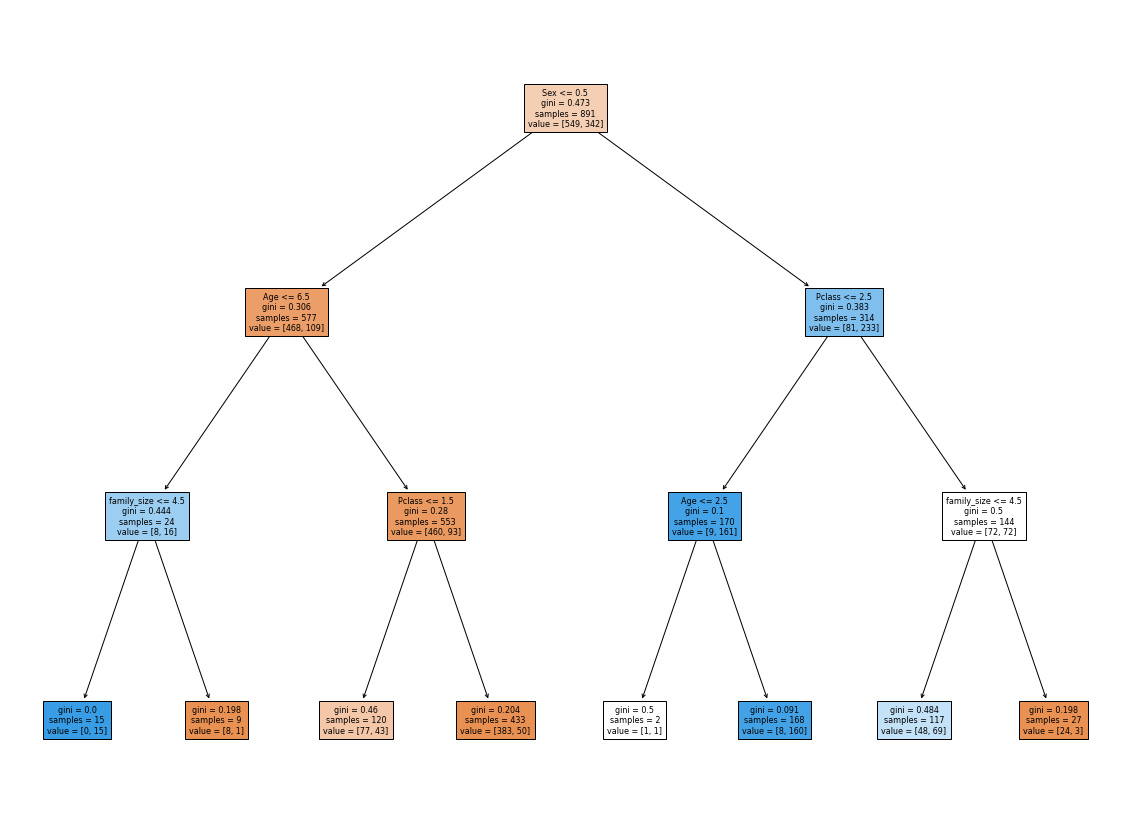

In [13]:
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize = (20,15))
_= plot_tree(model, 
             fontsize = 8,
             feature_names = dtc_train.columns, 
             filled = True)

acc_decision_tree = round(model.score(dtc_train, survival) * 100, 2)
acc_decision_tree


The overall accuracy of the classification is 82.72. The very last leaf nodes shows that the classification for some of them didn't work well as the value of gini is higher than 0.45. 

e) Evaluate the classifier on the test set by plotting the confusion matrix. Comment on the pitfalls of the model (to help: For the examples that were misclassified, choose two at random and walk through the decision tree with their attributes and try to understand why the misclassification occured). **- 10 points**

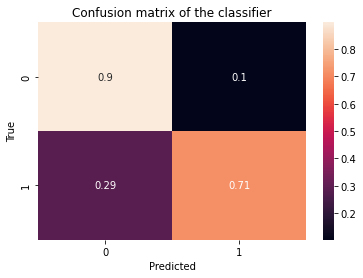

In [14]:
pred = model.predict(dtc_train)
cm = confusion_matrix(survival.to_numpy(), pred, normalize='true')
sns.heatmap(cm, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


-> Type 2 error(fall negatives) is higher than Type 1 error(False positives). Meaning that finding true survivors is harder than finding true death.  

f) Tune the parameters of the decision tree to improve its performance. Explain what you tried and what you observed. **- 5 points**

85.19

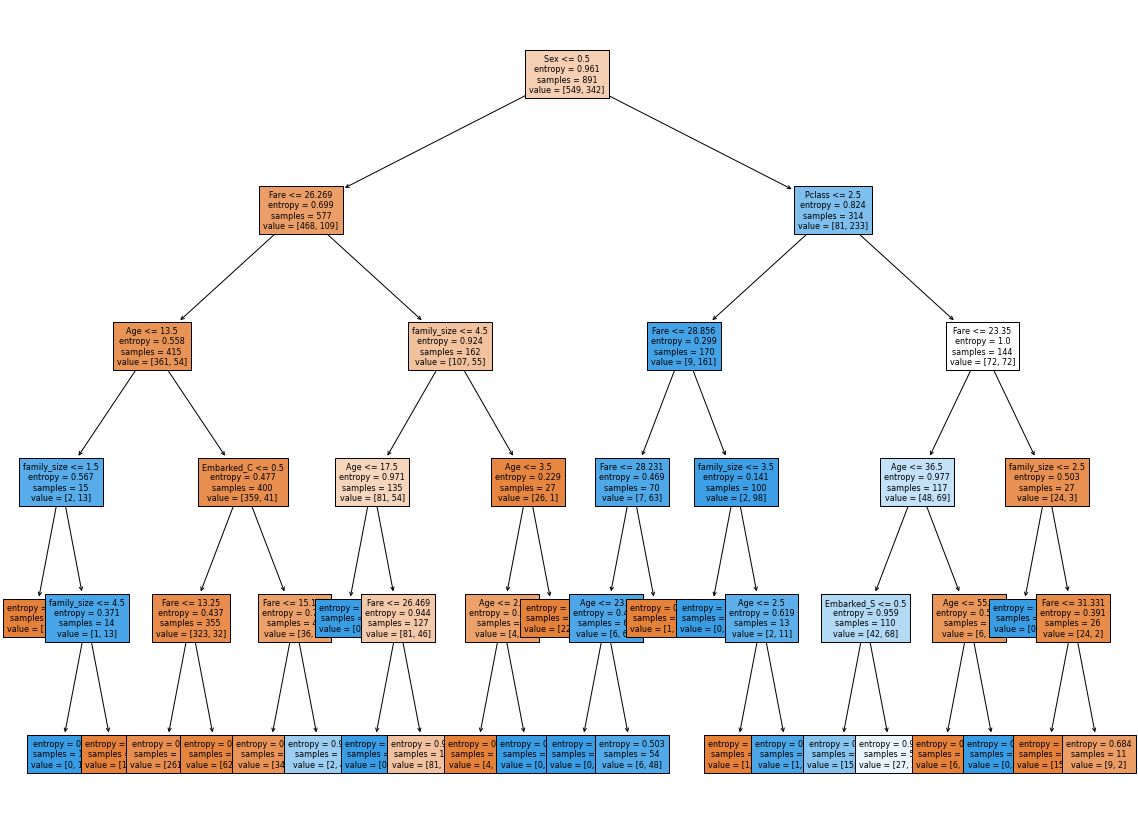

In [24]:
model2 = DecisionTreeClassifier(criterion = 'entropy',
                                max_depth = 5)
model2.fit(dtc_train, survival)

fig = plt.figure(figsize = (20,15))
_= plot_tree(model2, 
             fontsize = 8,
             feature_names = dtc_train.columns, 
             filled = True)

acc_decision_tree2 = round(model2.score(dtc_train, survival) * 100, 2)
acc_decision_tree2

-> I modified the parameter 'criterion' to 'entropy' and 'max_depth' to 5. The accuracy of the classification increased to "85.19".

g) Reduce the dimension of the dataset to 5 before creating a Decision Tree Classifier. Evaluate this classifier by plotting the confusion matrix. Comment on performance differences you observe. How interpretable is this model? Explain. **- 10 points**

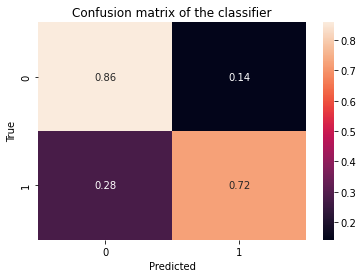

In [21]:
dimensionality_reduction = PCA(n_components = 5)

dr_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
model3 = make_pipeline(dimensionality_reduction, dr_model)
model3.fit(dtc_train, survival)

pred2 = model3.predict(dtc_train)
cm2 = confusion_matrix(survival.to_numpy(), pred2, normalize='true')
sns.heatmap(cm2, annot=True)
plt.title('Confusion matrix of the classifier')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


-> After reducing dimension, the model became more inaccurate compare to the previous model. The value of type 1 and 2 errors are larger than before (error increased). 

# Bonus (40 Points)

## Random Forests
 Random Forest algorithm is an extension to the decision trees. We make use of multiple decision trees to make a decsion(classification/regression) in Random Forests.

Ensemble modelling is a method of constructing a strong model using several weak models. Random Forests algorithm is one such ensemble model

Multiple small decision trees trained on random parts of the training data collectively make a decision on an input point. The number of trees in this Random Forest algorithm is a hyper-parameter that you need to finetune to get the best output from this model. 

Every time you construct a tree, you pick random samples of size 'k'(k samples) from the total dataset and construct the tree. Make sure your tree depth is not very high, or the individual tree could overfit to the data. We want the collective model to generalize well to multiple datasets. 

During classification, we consider the decision of the majority of trees to be the final decision. 

- In this task, you are supposed to construct a random forests algorithm on the 'Titanic' dataset making use of your decision trees from **1c** and get the classification outputs. 
 
 

**Note**: Your are not supposed to use random forests model from sklearn or any other library, but however, you can use those libraries to construct multiple decision trees 

You can use any other library for your convenience, unless you are not trying to load a Random forest model from those libraries. 

### Construct your model (10 points)

In [25]:
from sklearn import tree
from collections import Counter 

# Here is suggested template for you to use
# But feel free to do something different
class Random_Forest():

    def __init__(self, num_trees, max_depth, criterion):
        self.max_depth = max_depth
        self.criterion = criterion
        self.decision_trees = [tree.DecisionTreeClassifier(criterion=criterion, max_depth=max_depth) for _ in range(num_trees)]

    def _fit_tree(self, X, y, idx):
        self.decision_trees[idx].fit(X, y)

    def fit(self, X, y):
        for idx in range(len(self.decision_trees)):
            X_sample, y_sample = self._sample(X, y)
            self._fit_tree(X_sample, y_sample, idx)
    
    def _majority(predictions):
        data = Counter(predictions)
        return data.most_common(1)[0][0]
    
    def predict(self, X_test, y_test):
        self.decision_trees.fit(X_test, y_test)
        predictions = self.decision_trees.predict(self)
        return self._majority(predictions)



### Hyperparameter tuning, and model evaluation for random forests. (25 points)

In order to avoid the cases of overfitting, we apply something called 'pruning' to the decision trees in this algorithm. Pruning is a method to cut the trees beyond a certain depth. This introduces ambiguity and randomness to the output, while increasing the generalization capability. 

 - Experiment with tree sizes(tree depth) of depth = 5,10,15
 - Experiment with different number of trees [10,50,100,500,1000] and report accuracies
 - Experiment with different information criteria ['gini index', 'entropy'] 


Report the accuracy of your best model, and compare it with your accuracy of the decision tree from **1c**. Write your observations on Random Forests algorithm

In [ ]:
# write your code here


### Calculations (5 points)

$$ \text{Information gain} = \text{(Entropy of Parent Node)} - \sum_{c}{\text{(entropy of child node)} }$$

$$Entropy = \sum_{i=1}^{C} -p_{i}log(p_{i})$$
$$p_{i} = \frac{C_{i}}{ \sum_{j=1}^{C} C_{j}}$$
$$C_{i} = \text{Count of elements belonging to class 'i'}$$
$$C = \text{Total Number of Elements}$$

We have total data of 50,000 samples

- We randomly sampled about 5000 samples and trained a decision tree. 
- We are trying to classify the samples at a node for one of the tree 'T'
- Parent Node has 34 samples, out of which 15 are positive, and 19 are negative 
- We divided the node based on a particular column, and now we have two child nodes
- Child 1 has 13 samples, of which 9 are positive and 4 are negative
- Child 2 has 21 samples, of which 6 are positive and 15 are negative,

Calculate the information gain for splitting the parent note based on that column

**Note:** You can attach a handwritten image for this part or write your answer in the markdown cell below. 


**!!Uploaded a handwritten image!!**